In [20]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43 
cur_path = os.getcwd() 

for i in range(classes): 
    path = os.path.join(cur_path, 'train', str(i)) 
    for img in os.listdir(path):
        try:
            image = cv2.imread(os.path.join(path, img))
            image = cv2.resize(image, (30, 30))
            image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"An exception occurred: {e}")
            
data = np.array(data)
X_train = np.array(data)
labels = np.array(labels)



In [21]:
print(data.shape, labels.shape)
#Splitting training and validation set
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [22]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))


#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

eps = 7
anc = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))
model.save("my_model.h5")

Epoch 1/7
981/981 [==============================] - 38s 36ms/step - loss: 1.0000 - accuracy: 0.7162 - val_loss: 0.1521 - val_accuracy: 0.9597
Epoch 2/7
981/981 [==============================] - 42s 43ms/step - loss: 0.1555 - accuracy: 0.9543 - val_loss: 0.0469 - val_accuracy: 0.9899
Epoch 3/7
981/981 [==============================] - 35s 35ms/step - loss: 0.0889 - accuracy: 0.9741 - val_loss: 0.0377 - val_accuracy: 0.9906
Epoch 4/7
981/981 [==============================] - 34s 34ms/step - loss: 0.0592 - accuracy: 0.9817 - val_loss: 0.0289 - val_accuracy: 0.9926
Epoch 5/7
981/981 [==============================] - 30s 30ms/step - loss: 0.0542 - accuracy: 0.9838 - val_loss: 0.0338 - val_accuracy: 0.9911
Epoch 6/7
981/981 [==============================] - 30s 31ms/step - loss: 0.0438 - accuracy: 0.9862 - val_loss: 0.0213 - val_accuracy: 0.9953
Epoch 7/7
981/981 [==============================] - 30s 30ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0319 - val_accuracy: 0.9927

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


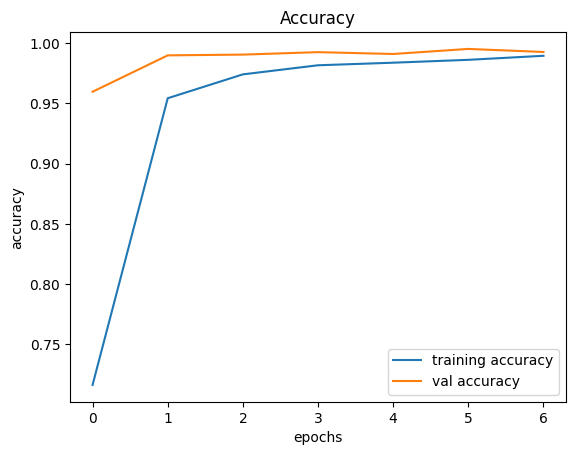

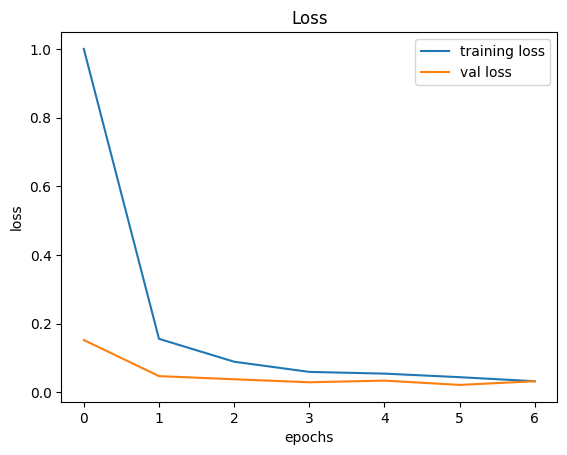

In [23]:
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [24]:

from sklearn.metrics import accuracy_score
# Read test CSV file
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Process test images using OpenCV
for img_path in imgs:
    try:
        # Read the image using OpenCV
        image = cv2.imread(img_path)
        
        # Resize the image to 30x30
        image = cv2.resize(image, (30, 30))
        
        # Normalize pixel values to [0, 1]
        image = np.array(image) / 255.0
        
        data.append(image)
    except Exception as e:
        print(f"An exception occurred: {e}")

# Convert the processed test data to a NumPy array
X_test = np.array(data)

# Make predictions on the test set
predictions = model.predict(X_test)


# Get the index of the class with the highest probability for each prediction
pred = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(labels, pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


395/395 [==============================] - 5s 12ms/step
Accuracy on test set: 96.49%
